# Simple time series prediction

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae

%matplotlib inline

In [13]:
path = "https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


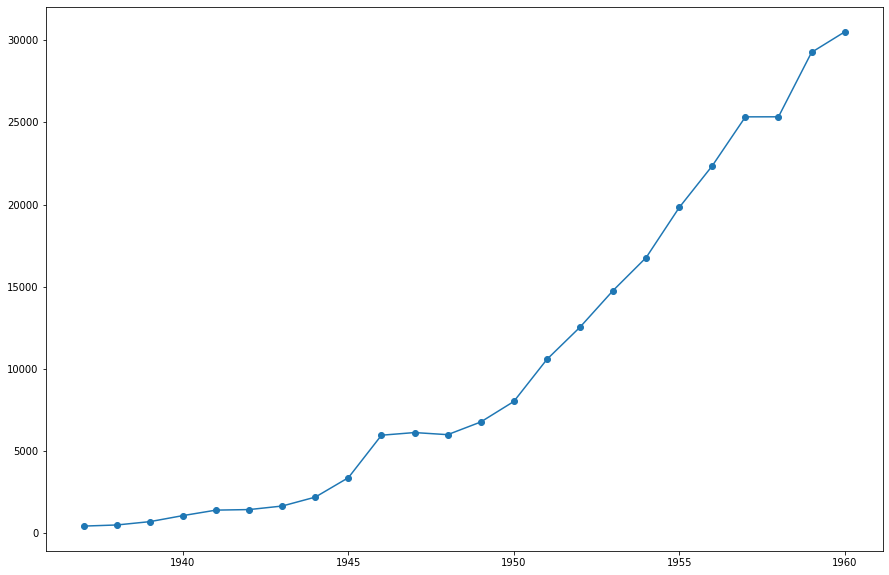

In [11]:
plt.figure(figsize=(15,10))
plt.plot( df.time, df.airmiles, '-o');

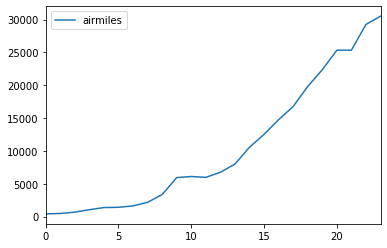

In [12]:
df[['airmiles']].plot();

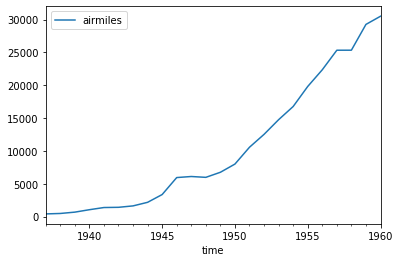

In [22]:
df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df[['airmiles']].plot();

In [23]:
df

,airmiles
time,
1937-01-01,412
1938-01-01,480
1939-01-01,683
1940-01-01,1052
1941-01-01,1385
1942-01-01,1418
1943-01-01,1634
1944-01-01,2178
1945-01-01,3362


In [45]:
def linear_func(airmiles, k=None, b=0):
    mean_value = np.mean(airmiles)
    if k is None:
        return [mean_value]*len(airmiles)
    return [idx*k+b for idx,_ in enumerate(airmiles)]

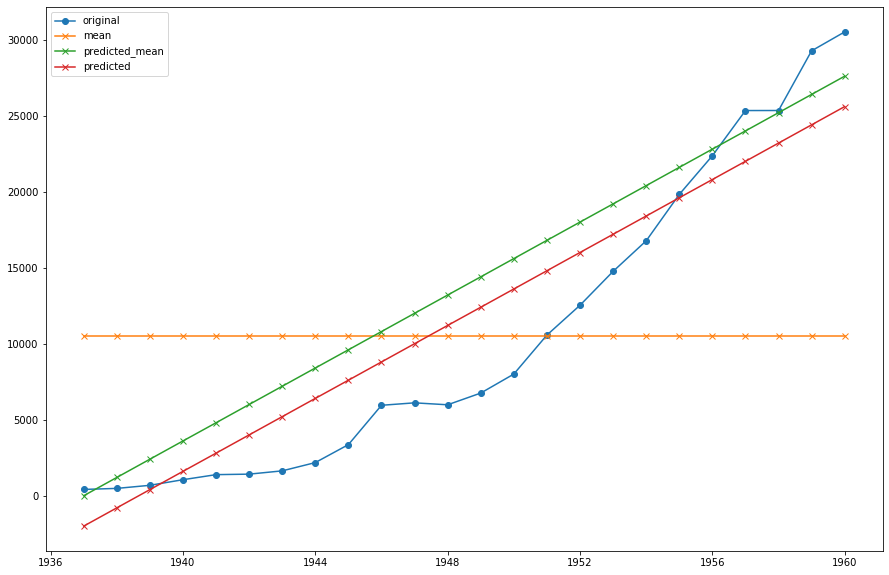

In [48]:
plt.figure(figsize=(15,10))
plt.plot( df.index, df.airmiles, 'o-', label='original');
plt.plot( df.index, linear_func(df.airmiles), 'x-', label='mean');
plt.plot( df.index, linear_func(df.airmiles, k=1200), 'x-', label='predicted_mean');
plt.plot( df.index, linear_func(df.airmiles, k=1200, b=-2000), 'x-', label='predicted');
plt.legend();

# Metryka sukcesu

In [49]:
print('mean',mae(df.airmiles, linear_func(df.airmiles)))
print('linear', mae(df.airmiles, linear_func(df.airmiles, k=1200, b=-2000)))

mean 8499.305555555557
linear 3024.0
